## OSLOM ## 
подберём такие параметры, которые бы давали максимальное значение nmi

In [11]:
import numpy as np
import random
random.seed = 108
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline

In [12]:
!pwd

/home/latna/aponom/clustering/Scripts


In [13]:
def generate_params(params):
    keys = list(params.keys())
    if len(keys) == 1:
        for value in params[keys[0]]:
            yield ( keys[0] + " " + str(value) )        
    if len( keys ) > 1:
        for value in params[keys[0]]:
            for remain_params in generate_params({k:params[k] for k in keys[1:]}):
                yield ( keys[0] + " " + str(value) + " " + remain_params )

In [117]:
def oslom_experiment(inputFileFull, groundTruth, params = {}, vertexNumerationShift=0, verbose=False):
    datasetName = inputFileFull.split('/')[-2]
    outputDir = "../Results/OSLOM2_{}".format(datasetName)
    inputFile =  outputDir + '/' + inputFileFull.split('/')[-1]
    outputFile = outputDir + '/' + inputFileFull.split('/')[-1] + "_oslo_files/tp"
#     outputFile = outputDir + '/' "tp"
    
    !mkdir {outputDir}
    !cp {inputFileFull} {outputDir}
    
    print("Output dir name: {}".format(outputDir) )
    print("old inputFileName : {}".format(inputFileFull) )
    print("new inputFileName : {}".format(inputFile) )
    print("Output file name: {}".format(outputFile) )
    
    !mkdir {outputDir}
    
    all_results = {}
    bestParam = "not found"
    onmi_best = 0;
    for param in tqdm(list(generate_params(params))):
        tmp=!(cd {outputDir} && ../../related_methods/OSLOM2/oslom_undir -f ../{inputFile} -uw {param})
        if verbose:
            print(tmp)
        !sed -i '/^#/d' {outputFile}
        lines=[]
        with open(outputFile) as f:
            lines = f.readlines()    
        with open(outputFile, 'w') as the_file:
            for line in lines:
                the_file.write(" ".join([str(int(a)+vertexNumerationShift) for a in line.split()]) + "\n")
        output = !../Overlapping-NMI/onmi {groundTruth} {outputFile}
        onmi=float(output[0].split()[1])
        all_results[param] = onmi
        if onmi >  onmi_best:
            bestParam = param
            onmi_best = onmi
    print("Best ONMI: {} params: '{}'".format(onmi_best, bestParam) )                   
    return all_results

In [95]:
def plot_graph_for_all_results(all_results, datasetName, random_choice='max'):
    xdata=[]
    ydata=[]
    zdata=[]
    df = pd.DataFrame()
    for param, onmi in all_results.items():
        splited = param.split()
        xdata.append(float(splited[1]))
        ydata.append(float(splited[3]))
        zdata.append(onmi)
        df = df.append({'x': float(splited[1]), 'y': float(splited[3]) , 'seed': int(splited[5]), 'z': onmi}, ignore_index=True)

    df_ddd = df.groupby(['x','y'], as_index=False)['z'].max()
    if (random_choice == 'mean'):
        df_ddd = df.groupby(['x','y'], as_index=False)['z'].mean()
    
    #coolwarm  viridis
    fig = plt.figure(figsize=(12, 10), dpi= 80)
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(df_ddd.x.values, df_ddd.y.values, df_ddd.z.values, cmap='plasma', edgecolor='none')
    ax.view_init(30, 55)
    ax.set_xlabel('t parameter')
    ax.set_ylabel('cp paramter')
    ax.set_zlabel('onmi vlue');
    ax.set_title('OSLOM\n Onmi {} values for 10-random seeds\nDataset: {}'.format(random_choice.upper(), datasetName));

# School Friendship #

In [81]:
params={}
params["-t"] = np.arange(0.05, 0.95, 0.1)
params["-cp"] = np.arange(0.05, 0.95, 0.1)
params["-seed"] = random.sample(range(1, 100), 10)

inputFile = "../datasets/school_friendship/school-2.dat"
groundTruth = "../datasets/school_friendship/truth-school.dat"

all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

mkdir: cannot create directory ‘OSLOM2_school_friendship’: File exists
Output dir name: OSLOM2_school_friendship
old inputFileName : ../datasets/school_friendship/school-2.dat
new inputFileName : OSLOM2_school_friendship/school-2.dat
Output file name: OSLOM2_school_friendship/school-2.dat_oslo_files/tp
mkdir: cannot create directory ‘OSLOM2_school_friendship’: File exists


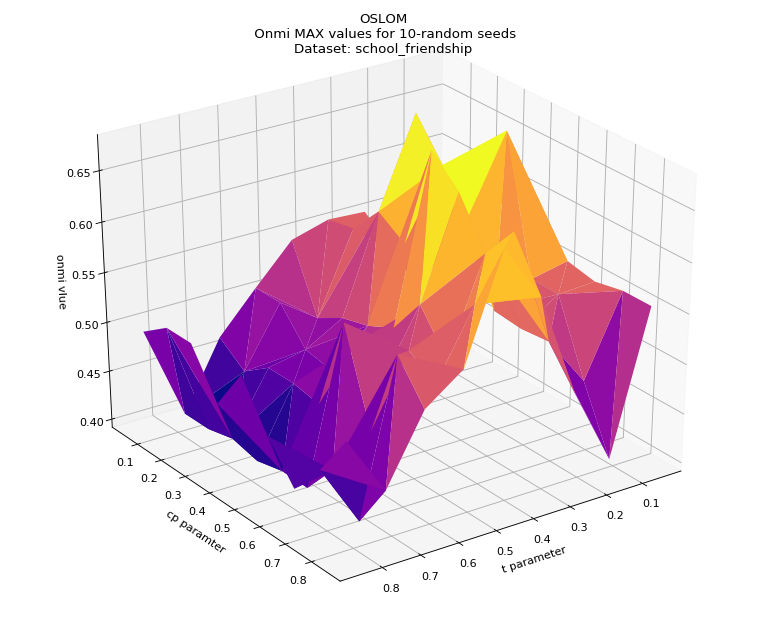

In [96]:
plot_graph_for_all_results(all_results, "school_friendship")

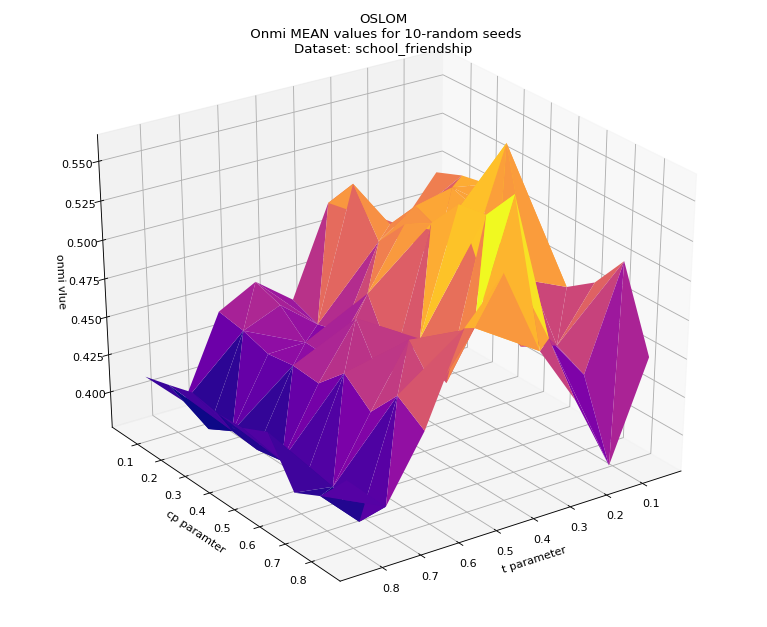

In [97]:
plot_graph_for_all_results(all_results, "school_friendship", random_choice='mean')

## Karate Club ##

In [108]:
inputFile = "../datasets/karate/karate.dat"
groundTruth = "../datasets/karate/truth_karate.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘OSLOM2_karate’: File exists
Output dir name: OSLOM2_karate
old inputFileName : ../datasets/karate/karate.dat
new inputFileName : OSLOM2_karate/karate.dat
Output file name: OSLOM2_karate/karate.dat_oslo_files/tp
mkdir: cannot create directory ‘OSLOM2_karate’: File exists



Best ONMI: 1.0 params: '-t 0.35000000000000003 -cp 0.05 -seed 81'


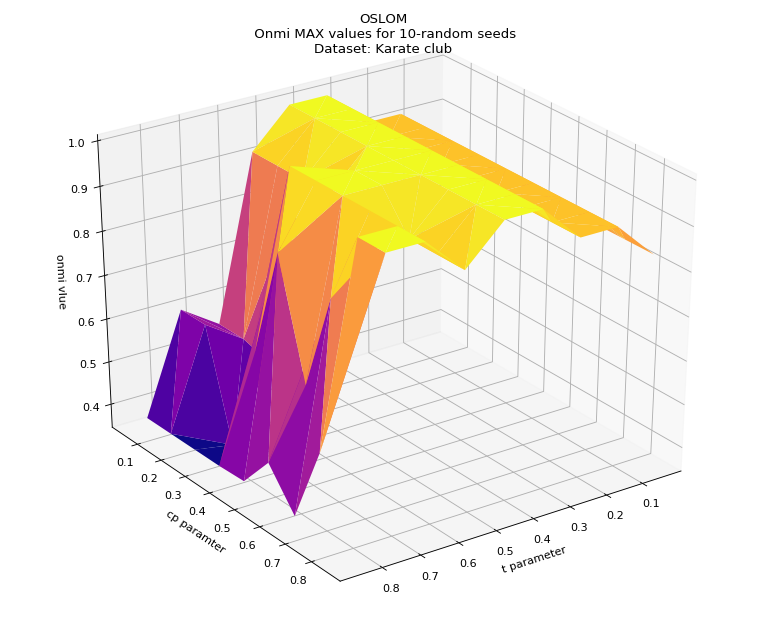

In [109]:
plot_graph_for_all_results(all_results, "Karate club", random_choice='max')

## Adj noun##

In [111]:
inputFile = "../datasets/adjnoun/adjnoun.dat"
groundTruth = "../datasets/adjnoun/truth_adjnoun.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘OSLOM2_adjnoun’: File exists
Output dir name: OSLOM2_adjnoun
old inputFileName : ../datasets/adjnoun/adjnoun.dat
new inputFileName : OSLOM2_adjnoun/adjnoun.dat
Output file name: OSLOM2_adjnoun/adjnoun.dat_oslo_files/tp
mkdir: cannot create directory ‘OSLOM2_adjnoun’: File exists


Exception in thread Thread-34:
Traceback (most recent call last):
  File "/home/latna/daal/anaconda/anaconda3/envs/tensorflow/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/latna/daal/anaconda/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/latna/daal/anaconda/anaconda3/envs/tensorflow/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




Best ONMI: 0.0620827 params: '-t 0.05 -cp 0.05 -seed 81'


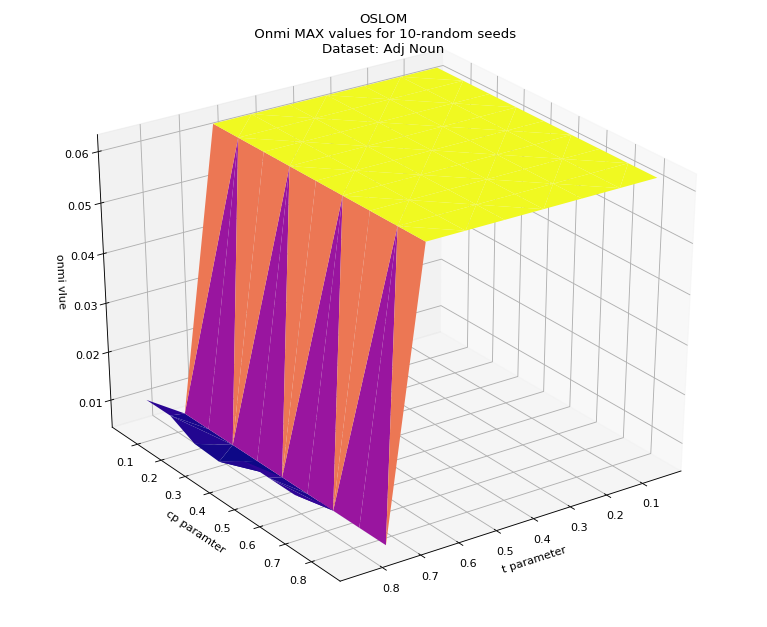

In [112]:
plot_graph_for_all_results(all_results, "Adj Noun", random_choice='max')

## American Football League ##

In [113]:
inputFile = "../datasets/football/footballTSEinput_original.dat"
groundTruth = "../datasets/football/truth_footballTSEinput.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

Output dir name: OSLOM2_football
old inputFileName : ../datasets/football/footballTSEinput_original.dat
new inputFileName : OSLOM2_football/footballTSEinput_original.dat
Output file name: OSLOM2_football/footballTSEinput_original.dat_oslo_files/tp
mkdir: cannot create directory ‘OSLOM2_football’: File exists



Best ONMI: 9.94572e-17 params: '-t 0.6500000000000001 -cp 0.7500000000000002 -seed 13'


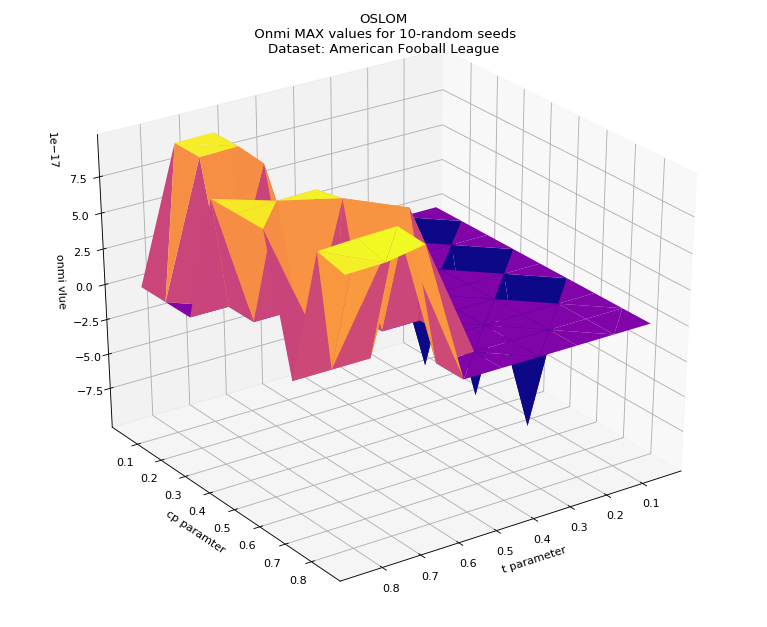

In [114]:
plot_graph_for_all_results(all_results, "American Fooball League", random_choice='max')

## Politics Books ##

In [115]:
inputFile = "../datasets/polbooks/polbooks.dat"
groundTruth = "../datasets/polbooks/truth_polbooks.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

Output dir name: OSLOM2_polbooks
old inputFileName : ../datasets/polbooks/polbooks.dat
new inputFileName : OSLOM2_polbooks/polbooks.dat
Output file name: OSLOM2_polbooks/polbooks.dat_oslo_files/tp
mkdir: cannot create directory ‘OSLOM2_polbooks’: File exists



Best ONMI: 0.435082 params: '-t 0.05 -cp 0.8500000000000002 -seed 21'


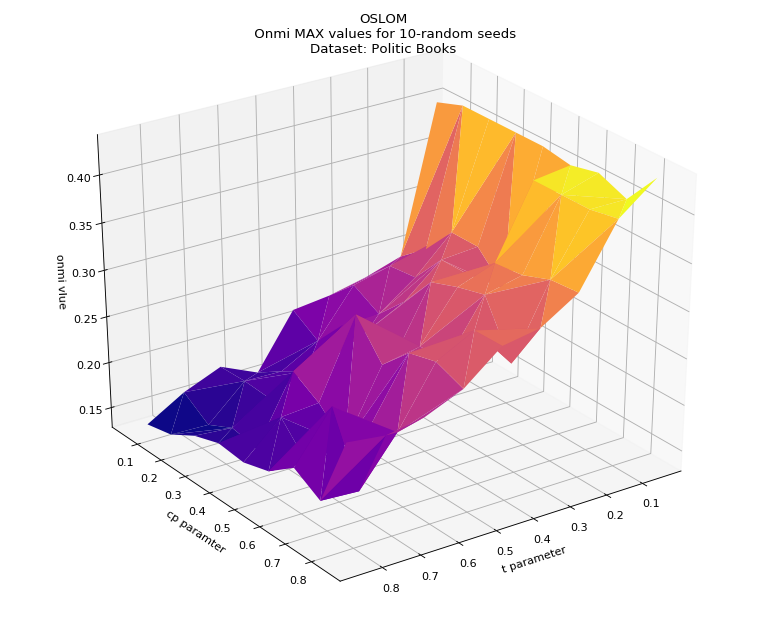

In [116]:
plot_graph_for_all_results(all_results, "Politic Books", random_choice='max')